/nix/store/ssh57gdxkajv5gvi8sdrjirbj1fv93mf-python3-3.10.6-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
{'trained_betas'} was not found in config. Values will be initialized to default values.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:16<00:00,  3.08it/s]


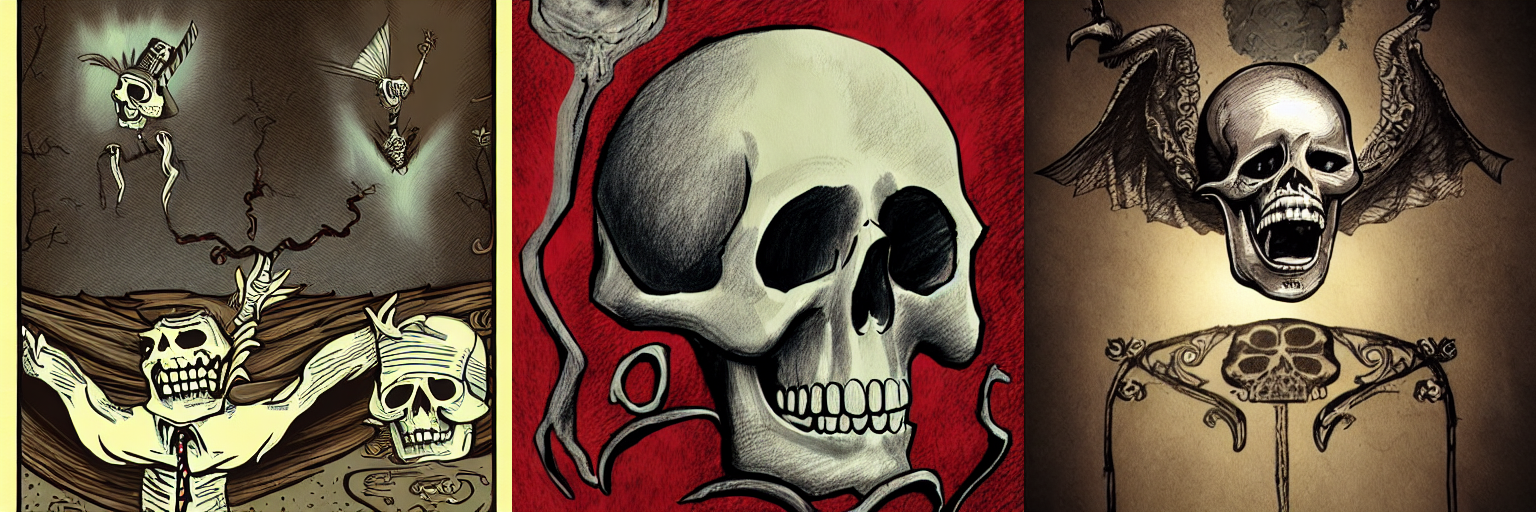

In [1]:
import os
import torch
import transformers

from configparser import ConfigParser
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image

parser = ConfigParser()
_ = parser.read('stable-diff.cfg')
HF_TOKEN = parser.get('hugging_face', 'token')

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid



pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=HF_TOKEN
)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()

num_images = 3
prompt = ["Flying skull telling a joke. A dark fantasy style"] * num_images
with autocast("cuda"):
    images = pipe(prompt, height=512, width=512).images 
    # image4 = pipe(prompt).images[0]

grid = image_grid(images, rows=1, cols=num_images)
display(grid)
grid.save(f"{prompt[0]}.png")

# display(image1)
# display(image2)
# display(image3)
# display(image4)

# image1.save(prompt + "1.png")
# image2.save(prompt + "2.png")
# image3.save(prompt + "3.png")
# image4.save(prompt + "4.png")